# Unit03 Pandas | 資料處理與分析基礎

本 Notebook 提供 Pandas 模組的完整實作範例，涵蓋 Series、DataFrame、資料讀寫、資料清理、時間序列處理、資料合併與分組等核心功能。

## 目標
- 熟悉 Pandas 的核心資料結構 (Series 與 DataFrame)
- 掌握資料讀取、寫入與各種格式轉換
- 學習資料選取、篩選、排序與索引操作
- 掌握資料清理與處理缺失值的方法
- 理解時間序列資料處理與重採樣
- 學習資料合併、分組與聚合運算
- 應用 Pandas 於化工數據分析實例

---
## 0. 環境設定與載入套件

In [1]:
# 基礎套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime, timedelta

# 設定隨機種子（確保結果可重現）
SEED = 42
np.random.seed(SEED)

# 設定顯示選項
pd.set_option('display.max_columns', None)  # 顯示所有欄位
pd.set_option('display.precision', 2)       # 浮點數精度
warnings.filterwarnings('ignore')

# Matplotlib 中文設定
plt.rcParams['axes.unicode_minus'] = False

# 檢查版本
print(f"NumPy 版本: {np.__version__}")
print(f"Pandas 版本: {pd.__version__}")
print("✓ 環境設定完成！")

NumPy 版本: 1.23.5
Pandas 版本: 2.3.3
✓ 環境設定完成！


---
## 1. Pandas 簡介

### 1.1 什麼是 Pandas？

Pandas 是 Python 中最重要的數據分析工具庫之一，名稱源自「Panel Data」（面板數據）與「Python Data Analysis」。它提供了高效能、易於使用的資料結構和數據分析工具。

### 1.2 為什麼要使用 Pandas？

- **直觀的資料結構**：提供 Series (一維) 和 DataFrame (二維) 兩種核心資料結構
- **強大的資料操作**：輕鬆進行篩選、合併、重塑、分組等操作
- **處理多種資料格式**：支援 CSV、Excel、JSON、SQL 等多種格式
- **時間序列功能**：內建完整的日期時間處理功能
- **與 NumPy 整合**：底層使用 NumPy 陣列，效能優異

### 1.3 Pandas 在化工數據分析中的應用

Pandas 特別適合處理化工製程中的各類數據：

- **實驗數據管理**：整理批次實驗結果、反應條件參數
- **製程監控**：處理感測器時間序列數據、即時數據分析
- **品質管制**：統計分析、異常值檢測、趨勢追蹤
- **數據清理**：處理缺失值、異常值、重複數據
- **報表產生**：產生各類統計報表、匯出分析結果

### 1.4 Pandas 基本概念

Pandas 的兩大核心資料結構：

| 資料結構 | 維度 | 說明 | 類比 |
|---------|------|------|------|
| **Series** | 1D | 帶標籤的一維陣列 | Excel 的單一欄位 |
| **DataFrame** | 2D | 帶標籤的二維表格 | Excel 工作表 |

接下來我們將詳細學習這兩種資料結構的使用方法。

---
## 2. Pandas 核心資料結構

### 2.1 Series：一維標籤陣列

Series 是帶有標籤索引的一維陣列，可視為增強版的 NumPy 陣列或是單欄的 DataFrame。

#### 2.1.1 建立 Series

In [2]:
# 從 list 建立
s1 = pd.Series([10, 20, 30, 40, 50])
print("從 list 建立：")
print(s1)
print(f"索引: {s1.index}")
print(f"數值: {s1.values}")
print()

從 list 建立：
0    10
1    20
2    30
3    40
4    50
dtype: int64
索引: RangeIndex(start=0, stop=5, step=1)
數值: [10 20 30 40 50]



In [3]:
# 指定自訂索引
s2 = pd.Series([10, 20, 30, 40, 50], 
               index=['A', 'B', 'C', 'D', 'E'])
print("自訂索引：")
print(s2)
print()

自訂索引：
A    10
B    20
C    30
D    40
E    50
dtype: int64



In [4]:
# 從字典建立
temp_data = {'Mon': 25.5, 'Tue': 26.3, 'Wed': 24.8, 'Thu': 27.1, 'Fri': 25.9}
s3 = pd.Series(temp_data)
print("從字典建立：")
print(s3)
print(f"資料型態: {s3.dtype}")

從字典建立：
Mon    25.5
Tue    26.3
Wed    24.8
Thu    27.1
Fri    25.9
dtype: float64
資料型態: float64


#### 2.1.2 Series 索引與選取

In [5]:
# 化工應用範例：反應器溫度記錄
temperatures = pd.Series(
    [350, 355, 360, 358, 362, 365, 368],
    index=['0h', '1h', '2h', '3h', '4h', '5h', '6h'],
    name='Reactor Temperature (°C)'
)

print("反應器溫度記錄：")
print(temperatures)

反應器溫度記錄：
0h    350
1h    355
2h    360
3h    358
4h    362
5h    365
6h    368
Name: Reactor Temperature (°C), dtype: int64


In [6]:

# 單一索引存取
print(f"第 2 小時溫度: {temperatures['2h']}°C")
print(f"位置索引 [2]: {temperatures.iloc[2]}°C")

第 2 小時溫度: 360°C
位置索引 [2]: 360°C


In [7]:


# 切片操作
print("前 3 小時溫度：")
print(temperatures['0h':'2h'])

前 3 小時溫度：
0h    350
1h    355
2h    360
Name: Reactor Temperature (°C), dtype: int64


In [8]:
# 條件篩選
print("溫度 > 360°C 的時段：")
print(temperatures[temperatures > 360])

溫度 > 360°C 的時段：
4h    362
5h    365
6h    368
Name: Reactor Temperature (°C), dtype: int64


#### 2.1.3 Series 運算

In [9]:
# 向量化運算
pressures_bar = pd.Series([1.0, 1.5, 2.0, 2.5, 3.0])
pressures_psi = pressures_bar * 14.5038  # bar 轉 psi
print("壓力轉換 (bar → psi)：")
print(pressures_psi)

壓力轉換 (bar → psi)：
0    14.50
1    21.76
2    29.01
3    36.26
4    43.51
dtype: float64


In [10]:

# Series 間運算（自動對齊索引）
s1 = pd.Series([10, 20, 30], index=['A', 'B', 'C'])
s2 = pd.Series([5, 10, 15, 20], index=['A', 'B', 'C', 'D'])
result = s1 + s2
print("Series 自動對齊相加：")
print(result)  # D 的結果為 NaN（缺失值）

Series 自動對齊相加：
A    15.0
B    30.0
C    45.0
D     NaN
dtype: float64


### 2.2 DataFrame：二維標籤表格

DataFrame 是 Pandas 最核心的資料結構，是二維的標籤資料表。

#### 2.2.1 建立 DataFrame

In [11]:
# 方法 1：從字典建立
data = {
    'Temperature': [350, 355, 360, 358, 362],
    'Pressure': [2.0, 2.1, 2.2, 2.15, 2.25],
    'Conversion': [0.75, 0.78, 0.82, 0.80, 0.85]
}
df1 = pd.DataFrame(data)
print("從字典建立 DataFrame：")
print(df1)

從字典建立 DataFrame：
   Temperature  Pressure  Conversion
0          350      2.00        0.75
1          355      2.10        0.78
2          360      2.20        0.82
3          358      2.15        0.80
4          362      2.25        0.85


In [12]:
# 方法 2：從嵌套列表建立
data_list = [
    [350, 2.0, 0.75],
    [355, 2.1, 0.78],
    [360, 2.2, 0.82]
]
df2 = pd.DataFrame(data_list, 
                   columns=['Temperature', 'Pressure', 'Conversion'],
                   index=['Run1', 'Run2', 'Run3'])
print("從列表建立 DataFrame：")
print(df2)

從列表建立 DataFrame：
      Temperature  Pressure  Conversion
Run1          350       2.0        0.75
Run2          355       2.1        0.78
Run3          360       2.2        0.82


In [13]:
# 方法 3：從 NumPy 陣列建立
np.random.seed(42)
data_array = np.random.randn(5, 3)
df3 = pd.DataFrame(data_array,
                   columns=['A', 'B', 'C'],
                   index=['r1', 'r2', 'r3', 'r4', 'r5'])
print("從 NumPy 陣列建立 DataFrame：")
print(df3)

從 NumPy 陣列建立 DataFrame：
       A     B     C
r1  0.50 -0.14  0.65
r2  1.52 -0.23 -0.23
r3  1.58  0.77 -0.47
r4  0.54 -0.46 -0.47
r5  0.24 -1.91 -1.72


#### 2.2.2 DataFrame 基本屬性與方法

In [14]:
# 建立化工製程數據範例
process_data = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=6, freq='h'),
    'Temp_C': [350, 355, 360, 358, 362, 365],
    'Press_bar': [2.0, 2.1, 2.2, 2.15, 2.25, 2.3],
    'Flow_L_min': [100, 105, 110, 108, 112, 115],
    'Conv_pct': [75.0, 78.0, 82.0, 80.0, 85.0, 87.0]
})

print("化工製程數據：")
print(process_data)

化工製程數據：
                 Time  Temp_C  Press_bar  Flow_L_min  Conv_pct
0 2024-01-01 00:00:00     350       2.00         100      75.0
1 2024-01-01 01:00:00     355       2.10         105      78.0
2 2024-01-01 02:00:00     360       2.20         110      82.0
3 2024-01-01 03:00:00     358       2.15         108      80.0
4 2024-01-01 04:00:00     362       2.25         112      85.0
5 2024-01-01 05:00:00     365       2.30         115      87.0


In [15]:
print(f"資料形狀 (列, 欄): {process_data.shape}")

資料形狀 (列, 欄): (6, 5)


In [16]:
print(f"總元素數量: {process_data.size}")

總元素數量: 30


In [17]:
print(f"欄位名稱: {list(process_data.columns)}")

欄位名稱: ['Time', 'Temp_C', 'Press_bar', 'Flow_L_min', 'Conv_pct']


In [18]:
print(f"索引: {list(process_data.index)}")

索引: [0, 1, 2, 3, 4, 5]


In [19]:
print(f"資料型態:\n{process_data.dtypes}")

資料型態:
Time          datetime64[ns]
Temp_C                 int64
Press_bar            float64
Flow_L_min             int64
Conv_pct             float64
dtype: object


In [20]:
# 常用方法
print("前 3 列資料 (head)：")
print(process_data.head(3))

前 3 列資料 (head)：
                 Time  Temp_C  Press_bar  Flow_L_min  Conv_pct
0 2024-01-01 00:00:00     350        2.0         100      75.0
1 2024-01-01 01:00:00     355        2.1         105      78.0
2 2024-01-01 02:00:00     360        2.2         110      82.0


In [21]:
print("後 2 列資料 (tail)：")
print(process_data.tail(2))

後 2 列資料 (tail)：
                 Time  Temp_C  Press_bar  Flow_L_min  Conv_pct
4 2024-01-01 04:00:00     362       2.25         112      85.0
5 2024-01-01 05:00:00     365       2.30         115      87.0


In [22]:
print("資料摘要資訊 (info)：")
process_data.info()

資料摘要資訊 (info)：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        6 non-null      datetime64[ns]
 1   Temp_C      6 non-null      int64         
 2   Press_bar   6 non-null      float64       
 3   Flow_L_min  6 non-null      int64         
 4   Conv_pct    6 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 368.0 bytes


In [23]:
print("數值欄位統計摘要 (describe)：")
print(process_data.describe())

數值欄位統計摘要 (describe)：
                      Time  Temp_C  Press_bar  Flow_L_min  Conv_pct
count                    6    6.00       6.00        6.00      6.00
mean   2024-01-01 02:30:00  358.33       2.17      108.33     81.17
min    2024-01-01 00:00:00  350.00       2.00      100.00     75.00
25%    2024-01-01 01:15:00  355.75       2.11      105.75     78.50
50%    2024-01-01 02:30:00  359.00       2.17      109.00     81.00
75%    2024-01-01 03:45:00  361.50       2.24      111.50     84.25
max    2024-01-01 05:00:00  365.00       2.30      115.00     87.00
std                    NaN    5.32       0.11        5.32      4.45


---
## 3. 資料讀取與寫入

Pandas 支援多種資料格式的讀取與寫入，是資料分析的第一步。

### 3.1 建立範例資料並寫入檔案

In [24]:
# 建立範例資料
sample_data = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=10, freq='D'),
    'Temperature': [350, 355, 360, 358, 362, 365, 368, 370, 372, 375],
    'Pressure': [2.0, 2.1, 2.2, 2.15, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5],
    'Conversion': [75.0, 78.0, 82.0, 80.0, 85.0, 87.0, 89.0, 90.0, 91.0, 92.0]
})

print("範例資料：")
print(sample_data)

範例資料：
        Date  Temperature  Pressure  Conversion
0 2024-01-01          350      2.00        75.0
1 2024-01-02          355      2.10        78.0
2 2024-01-03          360      2.20        82.0
3 2024-01-04          358      2.15        80.0
4 2024-01-05          362      2.25        85.0
5 2024-01-06          365      2.30        87.0
6 2024-01-07          368      2.35        89.0
7 2024-01-08          370      2.40        90.0
8 2024-01-09          372      2.45        91.0
9 2024-01-10          375      2.50        92.0


In [25]:
# 寫入 CSV 檔案
sample_data.to_csv('process_data.csv', index=False, encoding='utf-8-sig')
print("✓ 已寫入 process_data.csv")

✓ 已寫入 process_data.csv


In [26]:
# 寫入 Excel 檔案
sample_data.to_excel('process_data.xlsx', sheet_name='Data', index=False)
print("✓ 已寫入 process_data.xlsx")

✓ 已寫入 process_data.xlsx


In [27]:

# 寫入 JSON 檔案
sample_data.to_json('process_data.json', orient='records', indent=2, date_format='iso')
print("✓ 已寫入 process_data.json")

✓ 已寫入 process_data.json


### 3.2 讀取 CSV 檔案

In [28]:
# 讀取 CSV 檔案
df_csv = pd.read_csv('process_data.csv')
print("從 CSV 讀取：")
print(df_csv.head())
print(f"資料形狀: {df_csv.shape}")

從 CSV 讀取：
         Date  Temperature  Pressure  Conversion
0  2024-01-01          350      2.00        75.0
1  2024-01-02          355      2.10        78.0
2  2024-01-03          360      2.20        82.0
3  2024-01-04          358      2.15        80.0
4  2024-01-05          362      2.25        85.0
資料形狀: (10, 4)


In [29]:
# 常用參數範例
df_csv_custom = pd.read_csv(
    'process_data.csv',
    sep=',',              # 分隔符號
    header=0,             # 標題列位置
    encoding='utf-8-sig', # 編碼格式
    parse_dates=['Date'], # 解析日期欄位
    index_col=None        # 不使用任何欄位作為索引
)
print("自訂參數讀取：")
print(df_csv_custom.head())

自訂參數讀取：
        Date  Temperature  Pressure  Conversion
0 2024-01-01          350      2.00        75.0
1 2024-01-02          355      2.10        78.0
2 2024-01-03          360      2.20        82.0
3 2024-01-04          358      2.15        80.0
4 2024-01-05          362      2.25        85.0


### 3.3 讀取 Excel 檔案

In [30]:
# 讀取 Excel 檔案
df_excel = pd.read_excel('process_data.xlsx', sheet_name='Data')
print("從 Excel 讀取：")
print(df_excel.head())

從 Excel 讀取：
        Date  Temperature  Pressure  Conversion
0 2024-01-01          350      2.00          75
1 2024-01-02          355      2.10          78
2 2024-01-03          360      2.20          82
3 2024-01-04          358      2.15          80
4 2024-01-05          362      2.25          85


In [31]:
# 查看 Excel 檔案中的所有工作表
excel_file = pd.ExcelFile('process_data.xlsx')
print(f"工作表名稱: {excel_file.sheet_names}")

工作表名稱: ['Data']


### 3.4 讀取 JSON 檔案

In [32]:
# 讀取 JSON 檔案
df_json = pd.read_json('process_data.json', orient='records')
print("從 JSON 讀取：")
print(df_json.head())
print(f"資料型態:\n{df_json.dtypes}")

從 JSON 讀取：
        Date  Temperature  Pressure  Conversion
0 2024-01-01          350      2.00          75
1 2024-01-02          355      2.10          78
2 2024-01-03          360      2.20          82
3 2024-01-04          358      2.15          80
4 2024-01-05          362      2.25          85
資料型態:
Date           datetime64[ns]
Temperature             int64
Pressure              float64
Conversion              int64
dtype: object


---
## 4. 資料選取與索引

### 4.1 選取欄位

In [33]:
# 建立範例 DataFrame
df = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=5, freq='h'),
    'Temp': [350, 355, 360, 358, 362],
    'Press': [2.0, 2.1, 2.2, 2.15, 2.25],
    'Flow': [100, 105, 110, 108, 112]
})

print("原始資料：")
print(df)

原始資料：
                 Time  Temp  Press  Flow
0 2024-01-01 00:00:00   350   2.00   100
1 2024-01-01 01:00:00   355   2.10   105
2 2024-01-01 02:00:00   360   2.20   110
3 2024-01-01 03:00:00   358   2.15   108
4 2024-01-01 04:00:00   362   2.25   112


In [34]:
# 選取單一欄位（回傳 Series）
temp_series = df['Temp']
print("選取單一欄位 (Temp)：")
print(temp_series)
print(f"型態: {type(temp_series)}")

選取單一欄位 (Temp)：
0    350
1    355
2    360
3    358
4    362
Name: Temp, dtype: int64
型態: <class 'pandas.core.series.Series'>


In [35]:
# 選取多個欄位（回傳 DataFrame）
subset = df[['Temp', 'Press']]
print("選取多個欄位：")
print(subset)
print(f"型態: {type(subset)}")

選取多個欄位：
   Temp  Press
0   350   2.00
1   355   2.10
2   360   2.20
3   358   2.15
4   362   2.25
型態: <class 'pandas.core.frame.DataFrame'>


In [36]:
# 新增計算欄位
df['Temp_K'] = df['Temp'] + 273.15
df['Press_psi'] = df['Press'] * 14.5038
print("新增計算欄位後：")
print(df)

新增計算欄位後：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
0 2024-01-01 00:00:00   350   2.00   100  623.15      29.01
1 2024-01-01 01:00:00   355   2.10   105  628.15      30.46
2 2024-01-01 02:00:00   360   2.20   110  633.15      31.91
3 2024-01-01 03:00:00   358   2.15   108  631.15      31.18
4 2024-01-01 04:00:00   362   2.25   112  635.15      32.63


### 4.2 選取列 (Row)

In [37]:
# 使用 loc（標籤索引）
print("使用 loc 選取：")
print("loc[0]（選取索引為 0 的列）：")
print(df.loc[0])


使用 loc 選取：
loc[0]（選取索引為 0 的列）：
Time         2024-01-01 00:00:00
Temp                         350
Press                        2.0
Flow                         100
Temp_K                    623.15
Press_psi                  29.01
Name: 0, dtype: object


In [38]:
print("loc[0:2]（選取索引 0 到 2 的列，包含端點）：")
print(df.loc[0:2])

loc[0:2]（選取索引 0 到 2 的列，包含端點）：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
0 2024-01-01 00:00:00   350    2.0   100  623.15      29.01
1 2024-01-01 01:00:00   355    2.1   105  628.15      30.46
2 2024-01-01 02:00:00   360    2.2   110  633.15      31.91


In [39]:
# 使用 iloc（位置索引）
print("使用 iloc 選取：")
print("iloc[0]（選取第 1 列）：")
print(df.iloc[0])

使用 iloc 選取：
iloc[0]（選取第 1 列）：
Time         2024-01-01 00:00:00
Temp                         350
Press                        2.0
Flow                         100
Temp_K                    623.15
Press_psi                  29.01
Name: 0, dtype: object


In [40]:
print("iloc[0:3]（選取前 3 列，不包含端點）：")
print(df.iloc[0:3])

iloc[0:3]（選取前 3 列，不包含端點）：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
0 2024-01-01 00:00:00   350    2.0   100  623.15      29.01
1 2024-01-01 01:00:00   355    2.1   105  628.15      30.46
2 2024-01-01 02:00:00   360    2.2   110  633.15      31.91


In [41]:
# 布林索引（條件篩選）
print("溫度 > 355°C 的資料：")
high_temp = df[df['Temp'] > 355]
print(high_temp)

溫度 > 355°C 的資料：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
2 2024-01-01 02:00:00   360   2.20   110  633.15      31.91
3 2024-01-01 03:00:00   358   2.15   108  631.15      31.18
4 2024-01-01 04:00:00   362   2.25   112  635.15      32.63


In [42]:
# 多條件篩選
print("溫度 > 355°C 且壓力 > 2.1 bar：")
filtered = df[(df['Temp'] > 355) & (df['Press'] > 2.1)]
print(filtered)

溫度 > 355°C 且壓力 > 2.1 bar：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
2 2024-01-01 02:00:00   360   2.20   110  633.15      31.91
3 2024-01-01 03:00:00   358   2.15   108  631.15      31.18
4 2024-01-01 04:00:00   362   2.25   112  635.15      32.63


### 4.3 loc 與 iloc 的綜合應用

In [43]:
# loc：標籤索引，[列, 欄]
print("loc 選取特定列與欄：")
print("loc[1:3, ['Temp', 'Press']]：")
print(df.loc[1:3, ['Temp', 'Press']])

loc 選取特定列與欄：
loc[1:3, ['Temp', 'Press']]：
   Temp  Press
1   355   2.10
2   360   2.20
3   358   2.15


In [44]:
# iloc：位置索引，[列, 欄]
print("iloc 選取特定位置：")
print("iloc[1:4, 1:3]：")
print(df.iloc[1:4, 1:3])

iloc 選取特定位置：
iloc[1:4, 1:3]：
   Temp  Press
1   355   2.10
2   360   2.20
3   358   2.15


In [45]:
# 混合選取
print("選取溫度 > 355 的資料，只顯示 Temp 和 Flow：")
print(df.loc[df['Temp'] > 355, ['Temp', 'Flow']])

選取溫度 > 355 的資料，只顯示 Temp 和 Flow：
   Temp  Flow
2   360   110
3   358   108
4   362   112


### 4.4 設定索引

In [46]:
# 將時間欄位設為索引
df_indexed = df.set_index('Time')
print("以 Time 為索引：")
print(df_indexed)

以 Time 為索引：
                     Temp  Press  Flow  Temp_K  Press_psi
Time                                                     
2024-01-01 00:00:00   350   2.00   100  623.15      29.01
2024-01-01 01:00:00   355   2.10   105  628.15      30.46
2024-01-01 02:00:00   360   2.20   110  633.15      31.91
2024-01-01 03:00:00   358   2.15   108  631.15      31.18
2024-01-01 04:00:00   362   2.25   112  635.15      32.63


In [47]:
# 重設索引
df_reset = df_indexed.reset_index()
print("重設索引：")
print(df_reset)

重設索引：
                 Time  Temp  Press  Flow  Temp_K  Press_psi
0 2024-01-01 00:00:00   350   2.00   100  623.15      29.01
1 2024-01-01 01:00:00   355   2.10   105  628.15      30.46
2 2024-01-01 02:00:00   360   2.20   110  633.15      31.91
3 2024-01-01 03:00:00   358   2.15   108  631.15      31.18
4 2024-01-01 04:00:00   362   2.25   112  635.15      32.63


In [48]:
# 多層索引範例
df_multi = pd.DataFrame({
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
    'Shift': ['Day', 'Night', 'Day', 'Night'],
    'Production': [100, 95, 105, 98]
})
df_multi_indexed = df_multi.set_index(['Date', 'Shift'])
print("多層索引：")
print(df_multi_indexed)

多層索引：
                  Production
Date       Shift            
2024-01-01 Day           100
           Night          95
2024-01-02 Day           105
           Night          98


---
## 5. 資料清理與處理

### 5.1 處理缺失值 (Missing Values)

In [49]:
# 建立包含缺失值的 DataFrame
data_with_nan = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [10, np.nan, 30, 40, 50],
    'C': [100, 200, 300, np.nan, 500]
})

print("原始資料：")
print(data_with_nan)

原始資料：
     A     B      C
0  1.0  10.0  100.0
1  2.0   NaN  200.0
2  NaN  30.0  300.0
3  4.0  40.0    NaN
4  5.0  50.0  500.0


In [50]:
# 檢測缺失值
print("缺失值標記：")
print(data_with_nan.isnull())

缺失值標記：
       A      B      C
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True
4  False  False  False


In [51]:
print("每欄缺失值數量：")
print(data_with_nan.isnull().sum())

每欄缺失值數量：
A    1
B    1
C    1
dtype: int64


In [52]:
# 刪除包含缺失值的列
print("刪除任何欄位有缺失值的列：")
print(data_with_nan.dropna())

刪除任何欄位有缺失值的列：
     A     B      C
0  1.0  10.0  100.0
4  5.0  50.0  500.0


In [53]:
print("刪除所有欄位都是缺失值的列：")
print(data_with_nan.dropna(how='all'))

刪除所有欄位都是缺失值的列：
     A     B      C
0  1.0  10.0  100.0
1  2.0   NaN  200.0
2  NaN  30.0  300.0
3  4.0  40.0    NaN
4  5.0  50.0  500.0


In [54]:
# 刪除包含缺失值的欄
print("刪除包含缺失值的欄：")
print(data_with_nan.dropna(axis=1))

刪除包含缺失值的欄：
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [55]:
# 填補缺失值
print("用 0 填補缺失值：")
print(data_with_nan.fillna(0))

用 0 填補缺失值：
     A     B      C
0  1.0  10.0  100.0
1  2.0   0.0  200.0
2  0.0  30.0  300.0
3  4.0  40.0    0.0
4  5.0  50.0  500.0


In [56]:
print("用前一個值填補（forward fill）：")
print(data_with_nan.ffill())

用前一個值填補（forward fill）：
     A     B      C
0  1.0  10.0  100.0
1  2.0  10.0  200.0
2  2.0  30.0  300.0
3  4.0  40.0  300.0
4  5.0  50.0  500.0


In [57]:
print("用後一個值填補（backward fill）：")
print(data_with_nan.bfill())

用後一個值填補（backward fill）：
     A     B      C
0  1.0  10.0  100.0
1  2.0  30.0  200.0
2  4.0  30.0  300.0
3  4.0  40.0  500.0
4  5.0  50.0  500.0


In [58]:
print("用平均值填補：")
print(data_with_nan.fillna(data_with_nan.mean()))

用平均值填補：
     A     B      C
0  1.0  10.0  100.0
1  2.0  32.5  200.0
2  3.0  30.0  300.0
3  4.0  40.0  275.0
4  5.0  50.0  500.0


### 5.2 處理重複值

In [59]:
# 建立包含重複值的 DataFrame
data_dup = pd.DataFrame({
    'ID': [1, 2, 2, 3, 4, 4, 5],
    'Value': [10, 20, 20, 30, 40, 40, 50]
})

print("原始資料：")
print(data_dup)

原始資料：
   ID  Value
0   1     10
1   2     20
2   2     20
3   3     30
4   4     40
5   4     40
6   5     50


In [60]:
# 檢測重複列
print("重複列標記：")
print(data_dup.duplicated())

重複列標記：
0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool


In [61]:
# 刪除重複列（保留第一次出現）
print("刪除重複列（保留首次）：")
print(data_dup.drop_duplicates())

刪除重複列（保留首次）：
   ID  Value
0   1     10
1   2     20
3   3     30
4   4     40
6   5     50


In [62]:
# 刪除重複列（保留最後一次出現）
print("刪除重複列（保留最後）：")
print(data_dup.drop_duplicates(keep='last'))

刪除重複列（保留最後）：
   ID  Value
0   1     10
2   2     20
3   3     30
5   4     40
6   5     50


In [63]:
# 根據特定欄位判斷重複
print("根據 Value 欄位刪除重複：")
print(data_dup.drop_duplicates(subset=['Value']))

根據 Value 欄位刪除重複：
   ID  Value
0   1     10
1   2     20
3   3     30
4   4     40
6   5     50


### 5.3 資料型態轉換

In [64]:
# 建立範例資料
df_types = pd.DataFrame({
    'A': ['1', '2', '3', '4'],
    'B': ['1.5', '2.5', '3.5', '4.5'],
    'C': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04']
})

print("原始資料型態：")
print(df_types.dtypes)
print()
print(df_types)
print()

原始資料型態：
A    object
B    object
C    object
dtype: object

   A    B           C
0  1  1.5  2024-01-01
1  2  2.5  2024-01-02
2  3  3.5  2024-01-03
3  4  4.5  2024-01-04



In [65]:
# 轉換為數值型態
df_types['A'] = df_types['A'].astype(int)
df_types['B'] = df_types['B'].astype(float)

# 轉換為日期時間型態
df_types['C'] = pd.to_datetime(df_types['C'])

print("轉換後的資料型態：")
print(df_types.dtypes)
print()
print(df_types)

轉換後的資料型態：
A             int32
B           float64
C    datetime64[ns]
dtype: object

   A    B          C
0  1  1.5 2024-01-01
1  2  2.5 2024-01-02
2  3  3.5 2024-01-03
3  4  4.5 2024-01-04


### 5.4 字串處理

In [66]:
# 建立包含字串的 DataFrame
df_str = pd.DataFrame({
    'Name': ['  Reactor A  ', 'REACTOR B', 'reactor c'],
    'Status': ['Running', 'Stopped', 'Maintenance']
})

print("原始資料：")
print(df_str)

原始資料：
            Name       Status
0    Reactor A        Running
1      REACTOR B      Stopped
2      reactor c  Maintenance


In [67]:
# 字串方法（需使用 .str 存取器）
df_str['Name_clean'] = df_str['Name'].str.strip()        # 移除前後空白
df_str['Name_lower'] = df_str['Name'].str.lower()        # 轉小寫
df_str['Name_upper'] = df_str['Name'].str.upper()        # 轉大寫
df_str['Name_title'] = df_str['Name'].str.strip().str.title()  # 標題格式

print("字串處理結果：")
print(df_str)

字串處理結果：
            Name       Status Name_clean     Name_lower     Name_upper  \
0    Reactor A        Running  Reactor A    reactor a      REACTOR A     
1      REACTOR B      Stopped  REACTOR B      reactor b      REACTOR B   
2      reactor c  Maintenance  reactor c      reactor c      REACTOR C   

  Name_title  
0  Reactor A  
1  Reactor B  
2  Reactor C  


In [68]:
# 字串搜尋與取代
print("包含 'reactor' 的列（不區分大小寫）：")
print(df_str[df_str['Name'].str.contains('reactor', case=False)])

包含 'reactor' 的列（不區分大小寫）：
            Name       Status Name_clean     Name_lower     Name_upper  \
0    Reactor A        Running  Reactor A    reactor a      REACTOR A     
1      REACTOR B      Stopped  REACTOR B      reactor b      REACTOR B   
2      reactor c  Maintenance  reactor c      reactor c      REACTOR C   

  Name_title  
0  Reactor A  
1  Reactor B  
2  Reactor C  


In [69]:
# 字串取代
df_str['Name_replaced'] = df_str['Name'].str.replace('reactor', 'Tank', case=False)
print("取代後：")
print(df_str[['Name', 'Name_replaced']])

取代後：
            Name Name_replaced
0    Reactor A        Tank A  
1      REACTOR B        Tank B
2      reactor c        Tank c


---
## 6. 時間序列資料處理

時間序列資料在化工製程監控中極為常見，Pandas 提供完整的日期時間處理功能。

### 6.1 建立日期時間物件

In [70]:
# 建立單一日期時間
dt1 = pd.Timestamp('2024-01-01 10:30:00')
print(f"單一時間點: {dt1}")

單一時間點: 2024-01-01 10:30:00


In [71]:
# 建立日期時間範圍
date_range = pd.date_range(
    start='2024-01-01',
    periods=10,
    freq='D'  # 'D'=日, 'h'=小時, 'min'=分鐘, 'S'=秒
)
print("日期範圍（每日）：")
print(date_range)

日期範圍（每日）：
DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10'],
              dtype='datetime64[ns]', freq='D')


In [72]:
# 建立時間序列 DataFrame
ts_data = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=24, freq='h'),
    'Temperature': np.random.uniform(350, 370, 24),
    'Pressure': np.random.uniform(2.0, 2.5, 24)
})
ts_data = ts_data.set_index('Time')
print("時間序列資料：")
print(ts_data.head())

時間序列資料：
                     Temperature  Pressure
Time                                      
2024-01-01 00:00:00       362.24      2.13
2024-01-01 01:00:00       352.79      2.33
2024-01-01 02:00:00       355.84      2.16
2024-01-01 03:00:00       357.33      2.26
2024-01-01 04:00:00       359.12      2.27


### 6.2 日期時間索引與選取

In [73]:
# 使用日期範圍選取
print("2024-01-01 的所有資料：")
print(ts_data.loc['2024-01-01'])

2024-01-01 的所有資料：
                     Temperature  Pressure
Time                                      
2024-01-01 00:00:00       362.24      2.13
2024-01-01 01:00:00       352.79      2.33
2024-01-01 02:00:00       355.84      2.16
2024-01-01 03:00:00       357.33      2.26
2024-01-01 04:00:00       359.12      2.27
2024-01-01 05:00:00       365.70      2.09
2024-01-01 06:00:00       353.99      2.48
2024-01-01 07:00:00       360.28      2.39
2024-01-01 08:00:00       361.85      2.47
2024-01-01 09:00:00       350.93      2.45
2024-01-01 10:00:00       362.15      2.30
2024-01-01 11:00:00       353.41      2.46
2024-01-01 12:00:00       351.30      2.04
2024-01-01 13:00:00       368.98      2.10
2024-01-01 14:00:00       369.31      2.02
2024-01-01 15:00:00       366.17      2.16
2024-01-01 16:00:00       356.09      2.19
2024-01-01 17:00:00       351.95      2.14
2024-01-01 18:00:00       363.68      2.41
2024-01-01 19:00:00       358.80      2.18
2024-01-01 20:00:00       352.44    

In [74]:
# 使用時間範圍選取
print("2024-01-01 00:00 到 05:00 的資料：")
print(ts_data.loc['2024-01-01 00:00':'2024-01-01 05:00'])

2024-01-01 00:00 到 05:00 的資料：
                     Temperature  Pressure
Time                                      
2024-01-01 00:00:00       362.24      2.13
2024-01-01 01:00:00       352.79      2.33
2024-01-01 02:00:00       355.84      2.16
2024-01-01 03:00:00       357.33      2.26
2024-01-01 04:00:00       359.12      2.27
2024-01-01 05:00:00       365.70      2.09


In [75]:
# 提取日期時間屬性
ts_data['Hour'] = ts_data.index.hour
ts_data['Day'] = ts_data.index.day
ts_data['Weekday'] = ts_data.index.day_name()
print("提取日期時間屬性後：")
print(ts_data.head(10))

提取日期時間屬性後：
                     Temperature  Pressure  Hour  Day Weekday
Time                                                         
2024-01-01 00:00:00       362.24      2.13     0    1  Monday
2024-01-01 01:00:00       352.79      2.33     1    1  Monday
2024-01-01 02:00:00       355.84      2.16     2    1  Monday
2024-01-01 03:00:00       357.33      2.26     3    1  Monday
2024-01-01 04:00:00       359.12      2.27     4    1  Monday
2024-01-01 05:00:00       365.70      2.09     5    1  Monday
2024-01-01 06:00:00       353.99      2.48     6    1  Monday
2024-01-01 07:00:00       360.28      2.39     7    1  Monday
2024-01-01 08:00:00       361.85      2.47     8    1  Monday
2024-01-01 09:00:00       350.93      2.45     9    1  Monday


### 6.3 時間序列運算

In [76]:
# 時間偏移
print("時間往後移動 2 小時：")
print(ts_data[['Temperature', 'Pressure']].shift(2).head())

時間往後移動 2 小時：
                     Temperature  Pressure
Time                                      
2024-01-01 00:00:00          NaN       NaN
2024-01-01 01:00:00          NaN       NaN
2024-01-01 02:00:00       362.24      2.13
2024-01-01 03:00:00       352.79      2.33
2024-01-01 04:00:00       355.84      2.16


In [77]:
# 時間差分（計算變化率）
ts_data['Temp_diff'] = ts_data['Temperature'].diff()
print("溫度變化率：")
print(ts_data[['Temperature', 'Temp_diff']].head(10))

溫度變化率：
                     Temperature  Temp_diff
Time                                       
2024-01-01 00:00:00       362.24        NaN
2024-01-01 01:00:00       352.79      -9.45
2024-01-01 02:00:00       355.84       3.05
2024-01-01 03:00:00       357.33       1.48
2024-01-01 04:00:00       359.12       1.79
2024-01-01 05:00:00       365.70       6.58
2024-01-01 06:00:00       353.99     -11.71
2024-01-01 07:00:00       360.28       6.29
2024-01-01 08:00:00       361.85       1.56
2024-01-01 09:00:00       350.93     -10.92


In [78]:
# 滾動視窗計算（移動平均）
ts_data['Temp_MA3'] = ts_data['Temperature'].rolling(window=3).mean()
print("3 小時移動平均：")
print(ts_data[['Temperature', 'Temp_MA3']].head(10))

3 小時移動平均：
                     Temperature  Temp_MA3
Time                                      
2024-01-01 00:00:00       362.24       NaN
2024-01-01 01:00:00       352.79       NaN
2024-01-01 02:00:00       355.84    356.96
2024-01-01 03:00:00       357.33    355.32
2024-01-01 04:00:00       359.12    357.43
2024-01-01 05:00:00       365.70    360.72
2024-01-01 06:00:00       353.99    359.61
2024-01-01 07:00:00       360.28    359.99
2024-01-01 08:00:00       361.85    358.71
2024-01-01 09:00:00       350.93    357.69


### 6.4 時間重採樣 (Resampling)

In [79]:
# 建立分鐘級資料
minute_data = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=60, freq='min'),
    'Value': np.random.randn(60).cumsum()
}).set_index('Time')

print("原始分鐘級資料（前 10 筆）：")
print(minute_data.head(10))

原始分鐘級資料（前 10 筆）：
                     Value
Time                      
2024-01-01 00:00:00  -0.56
2024-01-01 00:01:00  -1.24
2024-01-01 00:02:00  -0.63
2024-01-01 00:03:00   0.40
2024-01-01 00:04:00   1.33
2024-01-01 00:05:00   0.50
2024-01-01 00:06:00   0.19
2024-01-01 00:07:00   0.52
2024-01-01 00:08:00   1.49
2024-01-01 00:09:00   1.01


In [80]:
# 下採樣：從分鐘降到小時（聚合）
hourly_mean = minute_data.resample('h').mean()
print("小時平均值：")
print(hourly_mean.head())

小時平均值：
            Value
Time             
2024-01-01   0.79


In [81]:
hourly_sum = minute_data.resample('h').sum()
print("小時總和：")
print(hourly_sum.head())

小時總和：
            Value
Time             
2024-01-01  47.66


In [82]:
# 上採樣：從小時升到分鐘（插值）
hourly_data = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=5, freq='h'),
    'Value': [10, 20, 30, 40, 50]
}).set_index('Time')

minute_interp = hourly_data.resample('30min').interpolate(method='linear')
print("線性插值至 30 分鐘：")
print(minute_interp)

線性插值至 30 分鐘：
                     Value
Time                      
2024-01-01 00:00:00   10.0
2024-01-01 00:30:00   15.0
2024-01-01 01:00:00   20.0
2024-01-01 01:30:00   25.0
2024-01-01 02:00:00   30.0
2024-01-01 02:30:00   35.0
2024-01-01 03:00:00   40.0
2024-01-01 03:30:00   45.0
2024-01-01 04:00:00   50.0


### 6.5 時間序列可視化

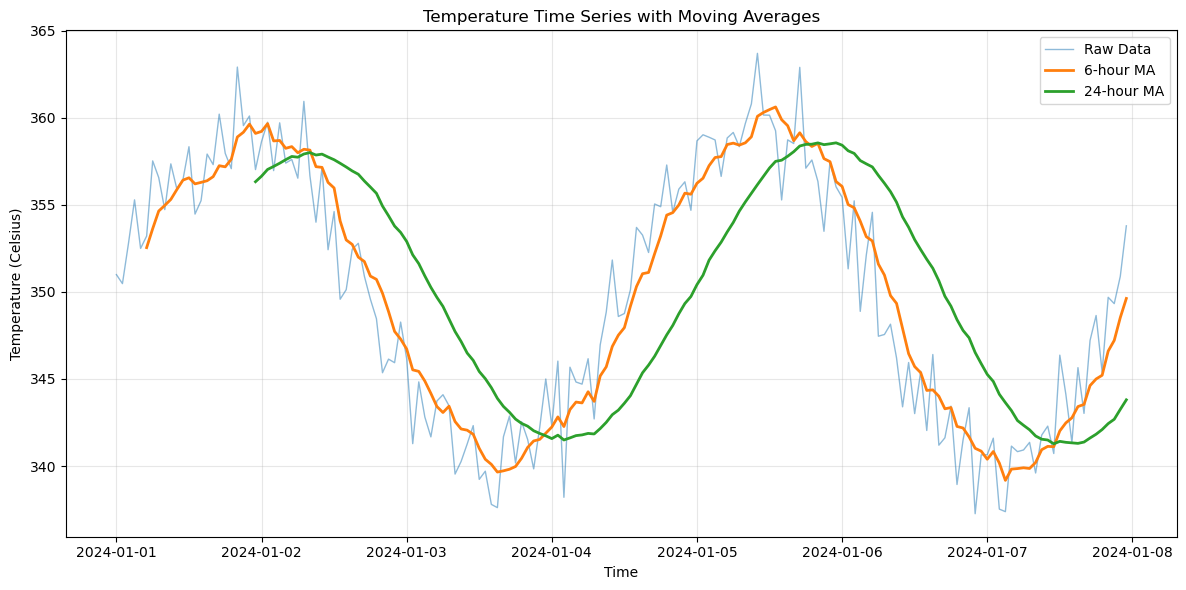

In [83]:
# 建立範例時間序列資料
np.random.seed(42)
ts = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=168, freq='h'),
    'Temperature': 350 + 10 * np.sin(np.linspace(0, 4*np.pi, 168)) + np.random.randn(168) * 2
}).set_index('Time')

# 計算移動平均
ts['MA_6h'] = ts['Temperature'].rolling(window=6).mean()
ts['MA_24h'] = ts['Temperature'].rolling(window=24).mean()

# 繪圖
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts['Temperature'], label='Raw Data', alpha=0.5, linewidth=1)
plt.plot(ts.index, ts['MA_6h'], label='6-hour MA', linewidth=2)
plt.plot(ts.index, ts['MA_24h'], label='24-hour MA', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Time Series with Moving Averages')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
## 7. 資料合併與分組

### 7.1 資料合併 (Merge)

In [84]:
# 建立兩個 DataFrame
df_temp = pd.DataFrame({
    'Reactor': ['R1', 'R2', 'R3'],
    'Temperature': [350, 360, 355]
})

df_press = pd.DataFrame({
    'Reactor': ['R1', 'R2', 'R4'],
    'Pressure': [2.0, 2.2, 2.1]
})

print("溫度資料：")
print(df_temp)

溫度資料：
  Reactor  Temperature
0      R1          350
1      R2          360
2      R3          355


In [85]:
print("壓力資料：")
print(df_press)


壓力資料：
  Reactor  Pressure
0      R1       2.0
1      R2       2.2
2      R4       2.1


In [86]:
# 內連接 (Inner Join)：只保留兩邊都有的
inner_merge = pd.merge(df_temp, df_press, on='Reactor', how='inner')
print("內連接 (Inner Join)：")
print(inner_merge)

內連接 (Inner Join)：
  Reactor  Temperature  Pressure
0      R1          350       2.0
1      R2          360       2.2


In [87]:
# 左連接 (Left Join)：保留左邊所有資料
left_merge = pd.merge(df_temp, df_press, on='Reactor', how='left')
print("左連接 (Left Join)：")
print(left_merge)

左連接 (Left Join)：
  Reactor  Temperature  Pressure
0      R1          350       2.0
1      R2          360       2.2
2      R3          355       NaN


In [88]:
# 外連接 (Outer Join)：保留所有資料
outer_merge = pd.merge(df_temp, df_press, on='Reactor', how='outer')
print("外連接 (Outer Join)：")
print(outer_merge)

外連接 (Outer Join)：
  Reactor  Temperature  Pressure
0      R1        350.0       2.0
1      R2        360.0       2.2
2      R3        355.0       NaN
3      R4          NaN       2.1


### 7.2 資料串接 (Concatenate)

In [89]:
# 縱向串接（堆疊列）
df1 = pd.DataFrame({
    'A': [1, 2],
    'B': [3, 4]
})

df2 = pd.DataFrame({
    'A': [5, 6],
    'B': [7, 8]
})

vertical_concat = pd.concat([df1, df2], axis=0, ignore_index=True)
print("縱向串接：")
print(vertical_concat)

縱向串接：
   A  B
0  1  3
1  2  4
2  5  7
3  6  8


In [90]:
# 橫向串接（擴展欄位）
df3 = pd.DataFrame({
    'C': [10, 20],
    'D': [30, 40]
})

horizontal_concat = pd.concat([df1, df3], axis=1)
print("橫向串接：")
print(horizontal_concat)

橫向串接：
   A  B   C   D
0  1  3  10  30
1  2  4  20  40


### 7.3 分組運算 (GroupBy)

In [91]:
# 建立化工實驗資料
experiment_data = pd.DataFrame({
    'Catalyst': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Temperature': [350, 360, 370, 350, 360, 370, 350, 360, 370],
    'Conversion': [75, 80, 85, 70, 78, 82, 72, 79, 84]
})

print("原始實驗資料：")
print(experiment_data)

原始實驗資料：
  Catalyst  Temperature  Conversion
0        A          350          75
1        A          360          80
2        A          370          85
3        B          350          70
4        B          360          78
5        B          370          82
6        C          350          72
7        C          360          79
8        C          370          84


In [92]:
# 依催化劑分組，計算平均值
catalyst_avg = experiment_data.groupby('Catalyst')['Conversion'].mean()
print("各催化劑的平均轉化率：")
print(catalyst_avg)

各催化劑的平均轉化率：
Catalyst
A    80.00
B    76.67
C    78.33
Name: Conversion, dtype: float64


In [93]:
# 多重聚合函數
catalyst_stats = experiment_data.groupby('Catalyst')['Conversion'].agg(['mean', 'std', 'min', 'max'])
print("各催化劑的統計摘要：")
print(catalyst_stats)

各催化劑的統計摘要：
           mean   std  min  max
Catalyst                       
A         80.00  5.00   75   85
B         76.67  6.11   70   82
C         78.33  6.03   72   84


In [94]:
# 多欄位分組
temp_catalyst_avg = experiment_data.groupby(['Temperature', 'Catalyst'])['Conversion'].mean()
print("溫度與催化劑組合的平均轉化率：")
print(temp_catalyst_avg)

溫度與催化劑組合的平均轉化率：
Temperature  Catalyst
350          A           75.0
             B           70.0
             C           72.0
360          A           80.0
             B           78.0
             C           79.0
370          A           85.0
             B           82.0
             C           84.0
Name: Conversion, dtype: float64


In [95]:
# 使用 transform（保持原始資料形狀）
experiment_data['Conv_Mean'] = experiment_data.groupby('Catalyst')['Conversion'].transform('mean')
experiment_data['Conv_Deviation'] = experiment_data['Conversion'] - experiment_data['Conv_Mean']
print("加入群組平均值與偏差：")
print(experiment_data)

加入群組平均值與偏差：
  Catalyst  Temperature  Conversion  Conv_Mean  Conv_Deviation
0        A          350          75      80.00           -5.00
1        A          360          80      80.00            0.00
2        A          370          85      80.00            5.00
3        B          350          70      76.67           -6.67
4        B          360          78      76.67            1.33
5        B          370          82      76.67            5.33
6        C          350          72      78.33           -6.33
7        C          360          79      78.33            0.67
8        C          370          84      78.33            5.67


### 7.4 透視表 (Pivot Table)

In [96]:
# 建立銷售資料範例
sales_data = pd.DataFrame({
    'Product': ['A', 'A', 'B', 'B', 'C', 'C'] * 2,
    'Region': ['North', 'South', 'North', 'South', 'North', 'South'] * 2,
    'Quarter': ['Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2'],
    'Sales': [100, 120, 80, 90, 110, 130, 95, 115, 75, 85, 105, 125]
})

print("原始銷售資料：")
print(sales_data)

原始銷售資料：
   Product Region Quarter  Sales
0        A  North      Q1    100
1        A  South      Q1    120
2        B  North      Q1     80
3        B  South      Q1     90
4        C  North      Q1    110
5        C  South      Q1    130
6        A  North      Q2     95
7        A  South      Q2    115
8        B  North      Q2     75
9        B  South      Q2     85
10       C  North      Q2    105
11       C  South      Q2    125


In [97]:
# 建立透視表
pivot = pd.pivot_table(
    sales_data,
    values='Sales',
    index='Product',
    columns='Region',
    aggfunc='sum'
)
print("銷售透視表：")
print(pivot)

銷售透視表：
Region   North  South
Product              
A          195    235
B          155    175
C          215    255


In [98]:
# 多維透視表
pivot_multi = pd.pivot_table(
    sales_data,
    values='Sales',
    index='Product',
    columns=['Region', 'Quarter'],
    aggfunc='mean'
)
print("多維透視表：")
print(pivot_multi)

多維透視表：
Region   North         South       
Quarter     Q1     Q2     Q1     Q2
Product                            
A        100.0   95.0  120.0  115.0
B         80.0   75.0   90.0   85.0
C        110.0  105.0  130.0  125.0


---
## 8. 化工領域應用案例

### 8.1 案例一：反應器批次數據分析

In [99]:
# 建立批次反應器數據
batch_data = pd.DataFrame({
    'Batch_ID': ['B001', 'B001', 'B001', 'B002', 'B002', 'B002', 'B003', 'B003', 'B003'],
    'Time_h': [0, 2, 4, 0, 2, 4, 0, 2, 4],
    'Temp_C': [25, 80, 85, 25, 82, 87, 25, 78, 83],
    'Conversion': [0, 65, 88, 0, 68, 90, 0, 62, 85]
})

print("批次反應器數據：")
print(batch_data)

批次反應器數據：
  Batch_ID  Time_h  Temp_C  Conversion
0     B001       0      25           0
1     B001       2      80          65
2     B001       4      85          88
3     B002       0      25           0
4     B002       2      82          68
5     B002       4      87          90
6     B003       0      25           0
7     B003       2      78          62
8     B003       4      83          85


In [100]:
# 計算每批次的平均轉化率
batch_avg = batch_data.groupby('Batch_ID')['Conversion'].mean()
print("各批次平均轉化率：")
print(batch_avg)

各批次平均轉化率：
Batch_ID
B001    51.00
B002    52.67
B003    49.00
Name: Conversion, dtype: float64


In [101]:
# 計算每批次的最終轉化率
final_conversion = batch_data.groupby('Batch_ID')['Conversion'].last()
print("各批次最終轉化率：")
print(final_conversion)

各批次最終轉化率：
Batch_ID
B001    88
B002    90
B003    85
Name: Conversion, dtype: int64


In [102]:
# 計算轉化率增長速率
batch_data['Conv_rate'] = batch_data.groupby('Batch_ID')['Conversion'].diff() / batch_data.groupby('Batch_ID')['Time_h'].diff()
print("轉化率變化速率：")
print(batch_data)

轉化率變化速率：
  Batch_ID  Time_h  Temp_C  Conversion  Conv_rate
0     B001       0      25           0        NaN
1     B001       2      80          65       32.5
2     B001       4      85          88       11.5
3     B002       0      25           0        NaN
4     B002       2      82          68       34.0
5     B002       4      87          90       11.0
6     B003       0      25           0        NaN
7     B003       2      78          62       31.0
8     B003       4      83          85       11.5


### 8.2 案例二：製程監控數據清理

In [103]:
# 建立包含異常值的製程數據
np.random.seed(42)
process_raw = pd.DataFrame({
    'Time': pd.date_range('2024-01-01', periods=20, freq='h'),
    'Temperature': [350, 355, 360, 999, 358, 362, 365, -99, 368, 370,
                   372, 375, 378, 380, 999, 382, 385, 388, 390, 392],
    'Pressure': [2.0, 2.1, np.nan, 2.2, 2.15, 2.25, np.nan, 2.3, 2.35, 2.4,
                2.45, np.nan, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85]
})

print("原始數據（包含異常值與缺失值）：")
print(process_raw)

原始數據（包含異常值與缺失值）：
                  Time  Temperature  Pressure
0  2024-01-01 00:00:00          350      2.00
1  2024-01-01 01:00:00          355      2.10
2  2024-01-01 02:00:00          360       NaN
3  2024-01-01 03:00:00          999      2.20
4  2024-01-01 04:00:00          358      2.15
5  2024-01-01 05:00:00          362      2.25
6  2024-01-01 06:00:00          365       NaN
7  2024-01-01 07:00:00          -99      2.30
8  2024-01-01 08:00:00          368      2.35
9  2024-01-01 09:00:00          370      2.40
10 2024-01-01 10:00:00          372      2.45
11 2024-01-01 11:00:00          375       NaN
12 2024-01-01 12:00:00          378      2.50
13 2024-01-01 13:00:00          380      2.55
14 2024-01-01 14:00:00          999      2.60
15 2024-01-01 15:00:00          382      2.65
16 2024-01-01 16:00:00          385      2.70
17 2024-01-01 17:00:00          388      2.75
18 2024-01-01 18:00:00          390      2.80
19 2024-01-01 19:00:00          392      2.85


In [104]:
# 步驟 1：識別並移除異常值
temp_mask = (process_raw['Temperature'] > 300) & (process_raw['Temperature'] < 500)
process_clean = process_raw[temp_mask].copy()
print("移除溫度異常值後：")
print(process_clean)

移除溫度異常值後：
                  Time  Temperature  Pressure
0  2024-01-01 00:00:00          350      2.00
1  2024-01-01 01:00:00          355      2.10
2  2024-01-01 02:00:00          360       NaN
4  2024-01-01 04:00:00          358      2.15
5  2024-01-01 05:00:00          362      2.25
6  2024-01-01 06:00:00          365       NaN
8  2024-01-01 08:00:00          368      2.35
9  2024-01-01 09:00:00          370      2.40
10 2024-01-01 10:00:00          372      2.45
11 2024-01-01 11:00:00          375       NaN
12 2024-01-01 12:00:00          378      2.50
13 2024-01-01 13:00:00          380      2.55
15 2024-01-01 15:00:00          382      2.65
16 2024-01-01 16:00:00          385      2.70
17 2024-01-01 17:00:00          388      2.75
18 2024-01-01 18:00:00          390      2.80
19 2024-01-01 19:00:00          392      2.85


In [105]:
# 步驟 2：處理缺失值（使用線性插值）
process_clean['Pressure'] = process_clean['Pressure'].interpolate(method='linear')
print("插值處理缺失值後：")
print(process_clean)

插值處理缺失值後：
                  Time  Temperature  Pressure
0  2024-01-01 00:00:00          350      2.00
1  2024-01-01 01:00:00          355      2.10
2  2024-01-01 02:00:00          360      2.12
4  2024-01-01 04:00:00          358      2.15
5  2024-01-01 05:00:00          362      2.25
6  2024-01-01 06:00:00          365      2.30
8  2024-01-01 08:00:00          368      2.35
9  2024-01-01 09:00:00          370      2.40
10 2024-01-01 10:00:00          372      2.45
11 2024-01-01 11:00:00          375      2.48
12 2024-01-01 12:00:00          378      2.50
13 2024-01-01 13:00:00          380      2.55
15 2024-01-01 15:00:00          382      2.65
16 2024-01-01 16:00:00          385      2.70
17 2024-01-01 17:00:00          388      2.75
18 2024-01-01 18:00:00          390      2.80
19 2024-01-01 19:00:00          392      2.85


In [106]:
# 步驟 3：計算移動平均（平滑數據）
process_clean['Temp_MA'] = process_clean['Temperature'].rolling(window=3, center=True).mean()
process_clean['Press_MA'] = process_clean['Pressure'].rolling(window=3, center=True).mean()
print("計算移動平均後：")
print(process_clean[['Time', 'Temperature', 'Temp_MA', 'Pressure', 'Press_MA']])

計算移動平均後：
                  Time  Temperature  Temp_MA  Pressure  Press_MA
0  2024-01-01 00:00:00          350      NaN      2.00       NaN
1  2024-01-01 01:00:00          355   355.00      2.10      2.07
2  2024-01-01 02:00:00          360   357.67      2.12      2.12
4  2024-01-01 04:00:00          358   360.00      2.15      2.18
5  2024-01-01 05:00:00          362   361.67      2.25      2.23
6  2024-01-01 06:00:00          365   365.00      2.30      2.30
8  2024-01-01 08:00:00          368   367.67      2.35      2.35
9  2024-01-01 09:00:00          370   370.00      2.40      2.40
10 2024-01-01 10:00:00          372   372.33      2.45      2.44
11 2024-01-01 11:00:00          375   375.00      2.48      2.48
12 2024-01-01 12:00:00          378   377.67      2.50      2.51
13 2024-01-01 13:00:00          380   380.00      2.55      2.57
15 2024-01-01 15:00:00          382   382.33      2.65      2.63
16 2024-01-01 16:00:00          385   385.00      2.70      2.70
17 2024-01-01 17

### 8.3 案例三：多反應器性能比較

In [107]:
# 建立多反應器數據
np.random.seed(42)
reactor_data = pd.DataFrame({
    'Date': pd.date_range('2024-01-01', periods=10),
    'R1_Conv': np.random.uniform(75, 85, 10),
    'R2_Conv': np.random.uniform(70, 80, 10),
    'R3_Conv': np.random.uniform(72, 82, 10)
})

print("多反應器數據：")
print(reactor_data.head())

多反應器數據：
        Date  R1_Conv  R2_Conv  R3_Conv
0 2024-01-01    78.75    70.21    78.12
1 2024-01-02    84.51    79.70    73.39
2 2024-01-03    82.32    78.32    74.92
3 2024-01-04    80.99    72.12    75.66
4 2024-01-05    76.56    71.82    76.56


In [108]:
# 重塑數據為長格式（Tidy Data）
reactor_long = pd.melt(
    reactor_data,
    id_vars=['Date'],
    value_vars=['R1_Conv', 'R2_Conv', 'R3_Conv'],
    var_name='Reactor',
    value_name='Conversion'
)
reactor_long['Reactor'] = reactor_long['Reactor'].str.replace('_Conv', '')

print("長格式數據：")
print(reactor_long.head())

長格式數據：
        Date Reactor  Conversion
0 2024-01-01      R1       78.75
1 2024-01-02      R1       84.51
2 2024-01-03      R1       82.32
3 2024-01-04      R1       80.99
4 2024-01-05      R1       76.56


In [109]:
# 計算各反應器統計摘要
reactor_stats = reactor_long.groupby('Reactor')['Conversion'].agg([
    ('Average', 'mean'),
    ('StdDev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)

print("各反應器性能統計：")
print(reactor_stats)

各反應器性能統計：
         Average  StdDev    Min    Max
Reactor                               
R1         80.20    3.16  75.58  84.51
R2         73.95    3.02  70.21  79.70
R3         76.00    2.34  72.46  79.85


---
## 9. 總結與最佳實踐

### 9.1 Pandas 核心概念回顧

本 Notebook 完整涵蓋了 Pandas 的核心功能：

1. **Series 與 DataFrame**：Pandas 的兩種核心資料結構
2. **索引系統**：強大的標籤索引，支援 loc 和 iloc
3. **資料讀寫**：支援 CSV、Excel、JSON 等多種格式
4. **資料清理**：處理缺失值、重複值、異常值
5. **時間序列**：完整的日期時間處理與重採樣功能
6. **資料轉換**：合併、分組、透視表等進階操作
7. **化工應用**：批次分析、製程監控、實驗數據處理

### 9.2 Pandas 使用最佳實踐

```python
# 1. 總是檢查資料概況
df.info()
df.describe()
df.head()

# 2. 使用向量化運算取代迴圈
# 避免：
# for i in range(len(df)):
#     df.loc[i, 'new_col'] = df.loc[i, 'col1'] * df.loc[i, 'col2']

# 推薦：
df['new_col'] = df['col1'] * df['col2']

# 3. 使用 copy() 避免意外修改原始資料
df_subset = df[df['col'] > 0].copy()

# 4. 鏈式操作提高可讀性
result = (df
    .query('Temperature > 350')
    .groupby('Catalyst')
    .agg({'Conversion': 'mean'})
    .sort_values('Conversion', ascending=False)
)

# 5. 使用 inplace=False（預設）保持資料不變性
df_sorted = df.sort_values('col', inplace=False)  # 推薦
```

### 9.3 下一步學習

- **Unit04**：使用 Matplotlib 與 Seaborn 進行資料視覺化
- **進階 Pandas**：多層索引、效能優化、大數據處理
- **實戰演練**：結合真實化工製程數據進行分析

### 9.4 參考資源

- Pandas 官方文檔：https://pandas.pydata.org/docs/
- Pandas API 參考：https://pandas.pydata.org/docs/reference/index.html
- 《Python for Data Analysis》by Wes McKinney（Pandas 創建者）

---

## ✓ 完成！

您已經完成 Unit03 Pandas 的完整學習，掌握了資料處理與分析的核心技能。請繼續練習並應用於實際問題中！